In [ ]:
model = resnet18()
# affine transform parameters of batch normalization
bn = []
# bias of convolutional and fully connected layers
conv_fc_b = []
# rest
rest = []
for name, para in model.named_parameters():
  if 'bn' in name:
    if 'weight' in name or 'bias' in name:
      bn.append(para)
  elif 'conv' in name or 'fc' in name:
    if 'bias' in name:
      conv_fc_b.append(para)
  else:
    rest.append(para)
print(bn)
print(conv_fc_b)
print(rest)


In [ ]:
!pip install randaugment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
transforms = ['ShearX','ShearY','TranslateX','TranslateY',
        'Rotate','Brightness','Color','Contrast',
        'Sharpness','Posterize','Solarize','Equalize']

(4000, 6000, 3)


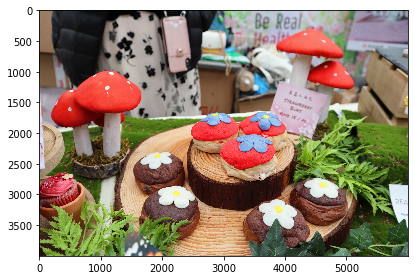

In [ ]:
# reading the image using its path
image = io.imread('/content/IMG_0471_20210321142110.JPG')

# shape of the image
print(image.shape)

# displaying the image
io.imshow(image)

In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('/content/IMG_0471_20210321142110.JPG)
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

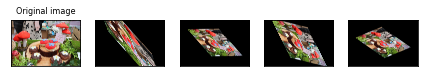

In [ ]:
# ShearX
affine_transfomer = T.RandomAffine(degrees=(30, 70), scale=(0.5, 0.75), shear=(30, 70))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

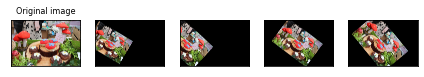

In [ ]:
#TranslateX
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.5, 0), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

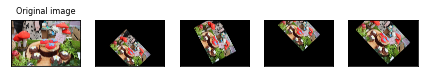

In [ ]:
# ShearY
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0, 0.3), scale=(0.5, 0.75), shear=(30, 50, 30, 70))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

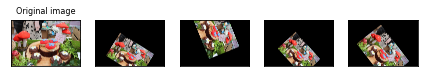

In [ ]:
#Translate Y
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

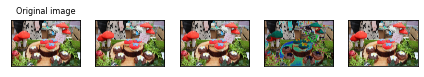

In [ ]:
#Solarize
solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

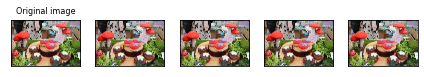

In [ ]:
#Sharpness
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

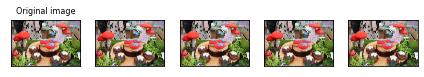

In [ ]:
# contrast
autocontraster = T.RandomAutocontrast(p=0.8)
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

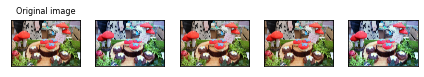

In [ ]:
# equalize
equalizer = T.RandomEqualize(p=0.6)
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

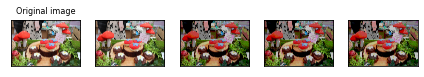

In [ ]:
# posterize
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

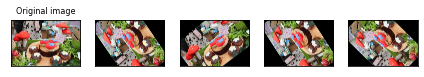

In [ ]:
# rotate
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

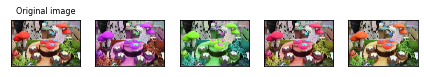

In [ ]:
# color
jitter = T.ColorJitter(hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

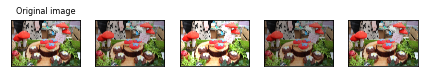

In [ ]:
#brightness
jitter = T.ColorJitter(brightness=.5)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)